In [1]:
# Here, we perform F-test, as taught in lecture, as a way feature selection method different from just dropping...
# ... uncorrelated features with aid from corr plot...
# ... or using Scree plot

# This file details the steps we took to explore the use of statsmodels.api's Ordinary Least Squares methods ...
# ... to perform F-test, and subsequently backward stepwise regression

# Much of the steps are constructed after investigating www.statsmodels.org to determine which method/attributes to call

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
import seaborn as sns; sns.set()
from itertools import combinations
import statsmodels.api as sm

raw = pd.read_excel('experiment8a.xlsx')

<AxesSubplot:>

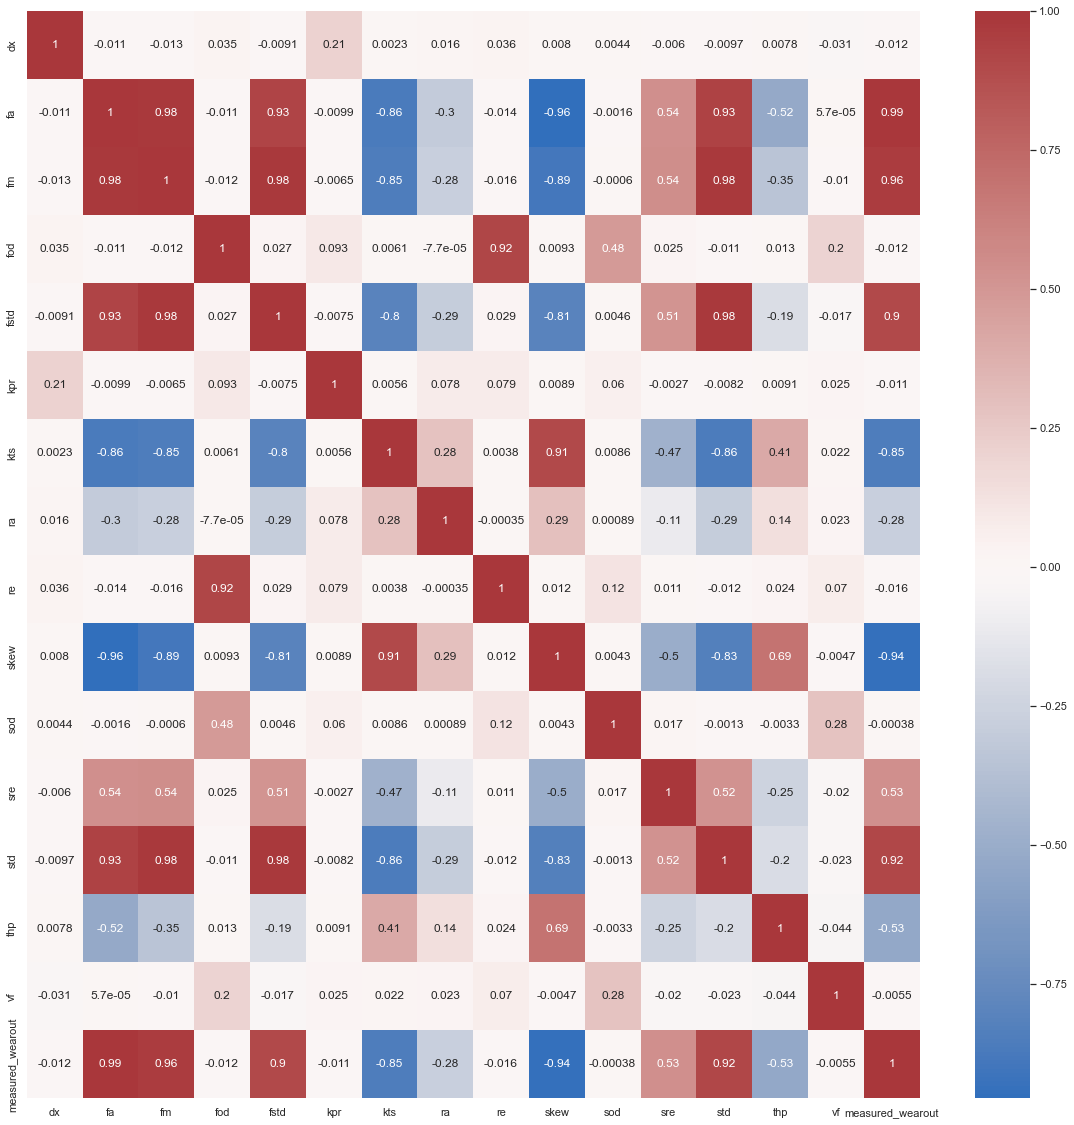

In [23]:
corr = raw.corr(method='pearson')      # For reference
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr, annot=True, cmap="vlag", center=0)

In [24]:
corrRow = corr.iloc[-1]                      # For reference
corrRow = corrRow.drop('measured_wearout')   
corrRowSorted = corrRow.sort_values(ascending = False, key = abs)     

corrRowSorted

fa      0.985036
fm      0.962200
skew   -0.943047
std     0.915847
fstd    0.900706
kts    -0.854838
sre     0.534269
thp    -0.532589
ra     -0.283093
re     -0.015664
dx     -0.011790
fod    -0.011504
kpr    -0.010948
vf     -0.005492
sod    -0.000377
Name: measured_wearout, dtype: float64

In [25]:
X = raw.drop(['measured_wearout'], axis = 1)    # Preparation of input and output DF
Y = raw['measured_wearout']

RSC = 9  # as per the project 2 single cutter file
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = RSC)

In [26]:
Results = sm.OLS(Y_train,X_train).fit()                     # Perform F-test and calculating p values of all parameters, then store into
Results.summary()                               # <  Results   >

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       measured_wearout   R-squared (uncentered):                   0.207
Model:                            OLS   Adj. R-squared (uncentered):              0.207
Method:                 Least Squares   F-statistic:                              914.3
Date:                Thu, 13 Oct 2022   Prob (F-statistic):                        0.00
Time:                        22:48:38   Log-Likelihood:                          27247.
No. Observations:               52428   AIC:                                 -5.446e+04
Df Residuals:                   52413   BIC:                                 -5.433e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dx         -7.401e-05      0.001     -0.115      0.909      -0.001       0.001
fa             0.1350      0.016      8.508      0.000       0.104       0.166
fm             0.0238      0.013      1.827      0.068      -0.002       0.049
fod           -0.0023      0.005     -0.465      0.642      -0.012       0.007
fstd           0.0028      0.008      0.359      0.719      -0.012       0.018
kpr        -2.137e-05      0.001     -0.033      0.974      -0.001       0.001
kts           -0.0623      0.008     -8.051      0.000      -0.077      -0.047
ra             0.0008      0.001      1.073      0.283      -0.001       0.002
re             0.0024      0.004      0.536      0.592      -0.006       0.011
skew           0.1613      0.018      9.199      0.000       0.127       0.196
sod            0.0015      0.002      0.759      0.448      -0.002       0.005
sre            0.0002      0.001      0.277      0.782      -0.001       0.002
std           -0.0139      0.012     -1.199      0.231      -0.037       0.009
thp           -0.0495      0.007     -6.672      0.000      -0.064      -0.035
vf            -0.0002      0.001     -0.277      0.781      -0.002       0.001
==============================================================================
Omnibus:                      687.675   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.753
Skew:                           0.029   Prob(JB):                     5.25e-91
Kurtosis:                       2.568   Cond. No.                         87.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
type(Results)                   # From now on we shall refer to this object type as RR, or RegressionResults

statsmodels.regression.linear_model.RegressionResultsWrapper

In [28]:
Results.pvalues           # Shows the pvalues. RR.pvalues returns the info as pd.Series...
PSrs = Results.pvalues    # ... which we store in PSrs (or pvalue Series)

PSrs

dx      9.087252e-01
fa      1.811925e-17
fm      6.773625e-02
fod     6.418646e-01
fstd    7.194551e-01
kpr     9.736811e-01
kts     8.367380e-16
ra      2.831388e-01
re      5.920567e-01
skew    3.740677e-20
sod     4.478148e-01
sre     7.816938e-01
std     2.305593e-01
thp     2.543400e-11
vf      7.814681e-01
dtype: float64

In [29]:
PSrs = PSrs.sort_values()                      # We sort pSrs from low to high p values ...
to_drop = PSrs.index[-1]                       # ... and then we find the parameter with the highest p value

to_drop                   # in this case the parameter is sre

'kpr'

In [30]:
newX_train = X_train.drop(to_drop, axis = 1 )              # We drop the highest pvalue parameter. This is the 'end' of ...
                                                           # ...the first treatment
newX_train

,dx,fa,fm,fod,fstd,kts,ra,re,skew,sod,sre,std,thp,vf
45307,0.466817,0.489845,0.518985,0.619012,0.366272,0.049368,-0.439892,0.454558,-0.375186,0.533625,0.556850,0.336866,-0.503512,-1.085236
36517,0.466817,-0.060880,-0.262891,0.559931,-0.099878,0.360320,-0.004603,0.825081,-0.007295,-0.559747,-0.773367,-0.311300,-0.461774,0.300081
8115,-0.070033,-1.236214,-0.948815,-0.841142,-0.693603,1.167201,-0.858313,-0.545237,1.614970,-0.927120,-1.109183,-0.637635,1.992305,-0.768904
61429,-0.300112,1.514603,1.754977,-0.225007,1.861590,-1.417160,-0.727296,-0.319603,-1.191501,0.140011,-0.162498,1.813233,0.168791,-1.008880
17398,0.926974,-0.677578,-0.774959,-0.908663,-1.093785,0.369170,0.661518,-1.667153,0.240498,0.997214,-0.130830,-0.947898,-0.653521,-0.114423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65462,-0.683576,1.993400,1.984884,0.146361,1.599560,-3.185349,1.053946,0.060207,-2.271942,-0.061170,-0.158089,2.237225,-0.991944,0.278265
501,-0.760269,-1.807212,-1.667039,-1.913047,-1.700489,0.286902,-0.058361,-1.559193,1.373251,-1.521915,-0.048053,-1.383132,1.073798,-0.725272
55934,0.160046,1.342837,1.597272,-0.393811,2.063536,-0.843709,-0.574990,-0.523227,-0.809922,0.288709,-0.943897,1.696334,0.786452,1.576317
20828,0.466817,-0.611274,-0.680906,-0.841142,-1.068907,1.124269,0.042118,-0.674061,0.587068,-1.093313,-0.061843,-0.977026,-0.591471,0.081921


In [31]:
results = sm.OLS(Y_train,newX_train).fit()            # Now we perform the 2nd F-test and check if there are any p values above 0.05
results.summary()                              # There are still some parameters with high p values, so we need to drop ...
                                               # the next highest p value parameter, and so on ...

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       measured_wearout   R-squared (uncentered):                   0.207
Model:                            OLS   Adj. R-squared (uncentered):              0.207
Method:                 Least Squares   F-statistic:                              979.6
Date:                Thu, 13 Oct 2022   Prob (F-statistic):                        0.00
Time:                        22:48:45   Log-Likelihood:                          27247.
No. Observations:               52428   AIC:                                 -5.447e+04
Df Residuals:                   52414   BIC:                                 -5.434e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dx         -7.856e-05      0.001     -0.125      0.901      -0.001       0.001
fa             0.1350      0.016      8.509      0.000       0.104       0.166
fm             0.0238      0.013      1.827      0.068      -0.002       0.049
fod           -0.0023      0.005     -0.466      0.642      -0.012       0.007
fstd           0.0028      0.008      0.361      0.718      -0.012       0.018
kts           -0.0623      0.008     -8.053      0.000      -0.077      -0.047
ra             0.0008      0.001      1.073      0.283      -0.001       0.002
re             0.0024      0.004      0.536      0.592      -0.006       0.011
skew           0.1613      0.018      9.203      0.000       0.127       0.196
sod            0.0015      0.002      0.759      0.448      -0.002       0.005
sre            0.0002      0.001      0.277      0.782      -0.001       0.002
std           -0.0139      0.012     -1.199      0.231      -0.037       0.009
thp           -0.0495      0.007     -6.676      0.000      -0.064      -0.035
vf            -0.0002      0.001     -0.278      0.781      -0.002       0.001
==============================================================================
Omnibus:                      687.664   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.730
Skew:                           0.029   Prob(JB):                     5.31e-91
Kurtosis:                       2.568   Cond. No.                         87.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Combining all the steps, we code a loop that will automatically perform F-test, check pvalues and drop parameters...
# ... until all parameter p values are less than 0.05

# Starting from the very beginning:

newX_train = X_train.copy()         # make a copy of original, preprocessed input variables

largestPval = 1             # to initialize the loop

numDropped = 0   # to keep track of number of treatments completed

while (largestPval > 0.05) :
    newResults = sm.OLS(Y_train,newX_train).fit()             # Perform F-test
    
    PSrs = newResults.pvalues                     # find p values and sort from low to high
    PSrs = PSrs.sort_values()
    largestPval = PSrs[-1]
    
    if (largestPval > 0.05):               # if largest P value is more than 0.05, we drop the corresponding parameter...
        to_drop = PSrs.index[-1]            # ... then we repeat the loop...
        newX_train = newX_train.drop(to_drop, axis = 1)
        numDropped = numDropped + 1
        print(str(to_drop) + ' dropped: \t' + str(len(newX_train.iloc[0]) ) + ' parameters remain.')
        
    

newResults.summary()                       # ... until all the p values are lower than 0.05
                                           # At this point, the stepwise regression is complete

kpr dropped: 	14 parameters remain.
dx dropped: 	13 parameters remain.
vf dropped: 	12 parameters remain.
sre dropped: 	11 parameters remain.
fstd dropped: 	10 parameters remain.
fod dropped: 	9 parameters remain.
re dropped: 	8 parameters remain.
sod dropped: 	7 parameters remain.
ra dropped: 	6 parameters remain.
std dropped: 	5 parameters remain.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       measured_wearout   R-squared (uncentered):                   0.207
Model:                            OLS   Adj. R-squared (uncentered):              0.207
Method:                 Least Squares   F-statistic:                              2742.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):                        0.00
Time:                        22:48:48   Log-Likelihood:                          27245.
No. Observations:               52428   AIC:                                 -5.448e+04
Df Residuals:                   52423   BIC:                                 -5.443e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fa             0.1215      0.013      9.314      0.000       0.096       0.147
fm             0.0219      0.010      2.168      0.030       0.002       0.042
kts           -0.0563      0.005    -11.710      0.000      -0.066      -0.047
skew           0.1514      0.013     11.915      0.000       0.126       0.176
thp           -0.0505      0.004    -11.761      0.000      -0.059      -0.042
==============================================================================
Omnibus:                      997.377   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              546.510
Skew:                           0.025   Prob(JB):                    2.12e-119
Kurtosis:                       2.502   Cond. No.                         55.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Now we compare the MLR before and after the F-test stepwise regression

model = LinearRegression(fit_intercept = True)

ZERO = []
for i in range(len(X)):
    ZERO.append(0)


R2: 0.9818
MAE: 0.0081
MSE: 0.0001
RMSE: 0.0101


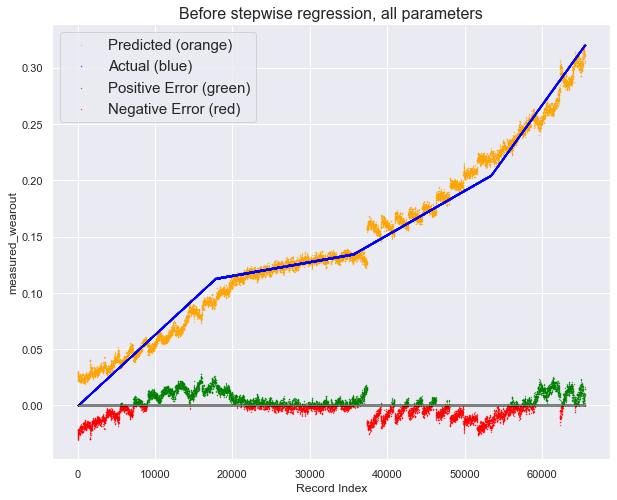

In [34]:
MLRtitle = 'Before stepwise regression, all parameters'

plt.figure(figsize=(10, 8))
plt.title(MLRtitle, size = 16)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)    #using reduced parameters

Y_error = Y_test-Y_pred
Y_errorP = Y_error[Y_error >= 0]            #splitting prediction error into 
Y_errorN = Y_error[Y_error < 0]              #positive(green) and negative(red) regions for better viewing

mse = mean_squared_error(Y_test, Y_pred)       #goodness-of-fit metrics
rmse = np.sqrt(mse)     
R2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print('R2: ' + str(R2.round(4)))
print('MAE: ' + str(mae.round(4)))
print('MSE: ' + str(mse.round(4)))
print('RMSE: ' + str(rmse.round(4)))

plt.scatter(Y_test.index, Y_pred, color='orange',label='Predicted (orange)',s=0.1)
plt.scatter(Y_test.index, Y_test, color='blue',label='Actual (blue)', s=0.1)
plt.scatter(Y_errorP.index, Y_errorP, color='green',label= 'Positive Error (green)',s=0.1)
plt.scatter(Y_errorN.index, Y_errorN, color='red',label='Negative Error (red)',s=0.1)

plt.scatter(range(len(ZERO)),ZERO, color = 'grey', s = 0.001)

plt.ylabel('measured_wearout')
plt.xlabel('Record Index')

plt.legend(fontsize = 15)

In [35]:
# Constructing training and testing DF after stepwise regression

paraLeft = newX_train.columns          # parameters left after stepwise regression
paraLeft

paraLeftString = ''

for para in paraLeft:
    paraLeftString = paraLeftString + ' ' + para

newX_test = X_test[paraLeft]

new R2: 0.9816
new MAE: 0.0082
new MSE: 0.0001
new RMSE: 0.0102


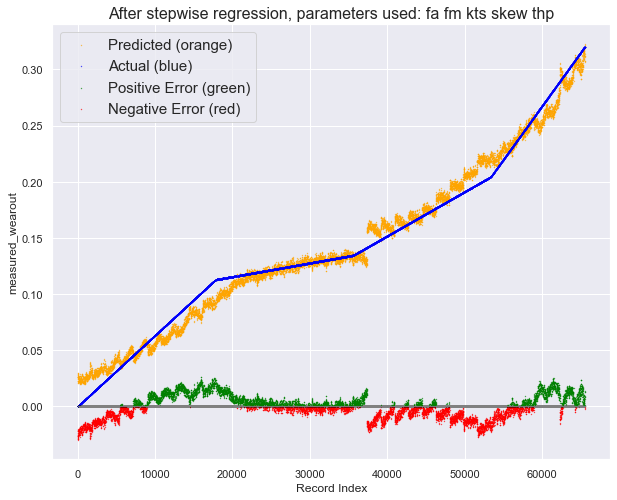

In [36]:
MLRtitle = 'After stepwise regression, parameters used:' + paraLeftString

plt.figure(figsize=(10, 8))
plt.title(MLRtitle, size = 16)

model.fit(newX_train, Y_train)

newY_pred = model.predict(newX_test)    #using reduced parameters

newY_error = Y_test-newY_pred
newY_errorP = newY_error[newY_error >= 0]            #splitting prediction error into 
newY_errorN = newY_error[newY_error < 0]              #positive(green) and negative(red) regions for better viewing

new_mse = mean_squared_error(Y_test, newY_pred)       #goodness-of-fit metrics
new_rmse = np.sqrt(new_mse)     
new_R2 = r2_score(Y_test, newY_pred)
new_mae = mean_absolute_error(Y_test, newY_pred)

print('new R2: ' + str(new_R2.round(4)))
print('new MAE: ' + str(new_mae.round(4)))
print('new MSE: ' + str(new_mse.round(4)))
print('new RMSE: ' + str(new_rmse.round(4)))

plt.scatter(Y_test.index, newY_pred, color='orange',label='Predicted (orange)',s=0.1)
plt.scatter(Y_test.index, Y_test, color='blue',label='Actual (blue)', s=0.1)
plt.scatter(newY_errorP.index, newY_errorP, color='green',label= 'Positive Error (green)',s=0.1)
plt.scatter(newY_errorN.index, newY_errorN, color='red',label='Negative Error (red)',s=0.1)

plt.scatter(range(len(ZERO)),ZERO, color = 'grey', s = 0.001)

plt.ylabel('measured_wearout')
plt.xlabel('Record Index')

plt.legend(fontsize = 15)

In [17]:
# Lets compare the more important metrics of both MLR

print('Number of parameters: ' + str(len(X_train.columns)) + ' -> ' + str(len(newX_train.columns)))
print('R2: ' + str(R2.round(4)) + ' -> ' + str(new_R2.round(4)))
print('RMSE: ' + str(rmse.round(4)) + ' -> ' + str(new_rmse.round(4)))

Number of parameters: 15 -> 5
R2: 0.9818 -> 0.9816
RMSE: 0.0101 -> 0.0102


In [37]:
percentChangeR2 = (new_R2-R2)/R2*100                         # calculating percentage change after stepwise regression
percentChangeRMSE = (new_rmse-rmse)/rmse*100                   

In [19]:
percentChangeR2.round(4)

-0.0234

In [20]:
percentChangeRMSE.round(4)

0.6289

In [21]:
# Despite dropping 10 parameters, the R2 and RMSE of the new MLR model only ...
# ...decreased and increased by 0.0234% and 0.6289% respectively!

# Comparing with the single cutter model where parameters were dropped based on the correlation r threshold,
# dropping the same number of parameters (by setting rthreshold = 0.9) ...
# ... resulted in a R2(0.9763) decrease of .56% and RMSE(0.0116) increase of 13.7%

# That is more than 20 times the percentage change of using F-test stepwise regression!

# In conclusion, F-test stepwise regression is a very powerful tool for feature selection in a reduced linear regression model

In [22]:
#END